In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
lorenze_df = pd.read_csv('../data/lorenze_attractor.csv', index_col=0)

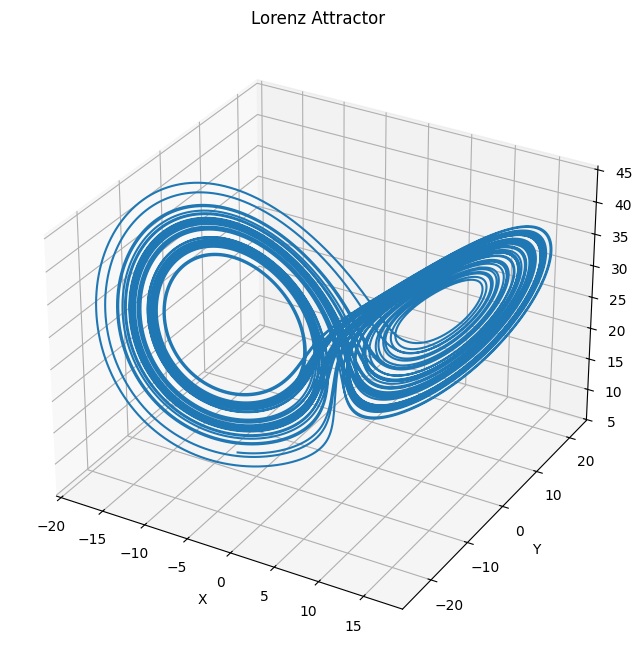

In [3]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(lorenze_df['X'], lorenze_df['Y'], lorenze_df['Z'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor')
plt.show()

In [ ]:
import neurokit2 as nk
import pandas as pd

# df['sheep'], df['wolves'], df['grass'] verilerinin hazır olduğunu varsayalım

# 1. Sheep için AMI Gecikmesini (Tau) Bulma
tau_sheep = nk.complexity_delay(lorenze_df['X'], delay_max=1000, method='fraser1986')

# 2. Wolves için AMI Gecikmesini (Tau) Bulma
tau_wolves = nk.complexity_delay(lorenze_df['Y'], delay_max=1000, method='fraser1986')

# 3. Grass için AMI Gecikmesini (Tau) Bulma
tau_grass = nk.complexity_delay(lorenze_df['Z'], delay_max=1000, method='fraser1986')

print(f"Tau AMI Sheep: {tau_sheep}")
print(f"Tau AMI Wolves: {tau_wolves}")
print(f"Tau AMI Grass: {tau_grass}")

Tau AMI Sheep: (np.int64(965), {'Values': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        1

In [ ]:
import numpy as np

lags = np.array(tau_sheep[1]['Values'])
scores = np.array(tau_sheep[1]['Scores'])

threshold = scores[0] * (1 / np.exp(1))

# İlk kesişim (üstten alta geçiş)
idx = np.where(scores <= threshold)[0]

if len(idx) > 0:
    tau_cross = lags[idx[0]]
    print("1/e eşiğini ilk geçen τ:", tau_cross)
else:
    tau_cross = None
    print("Eşik hiç geçilmedi")


1/e eşiğini ilk geçen τ: 225


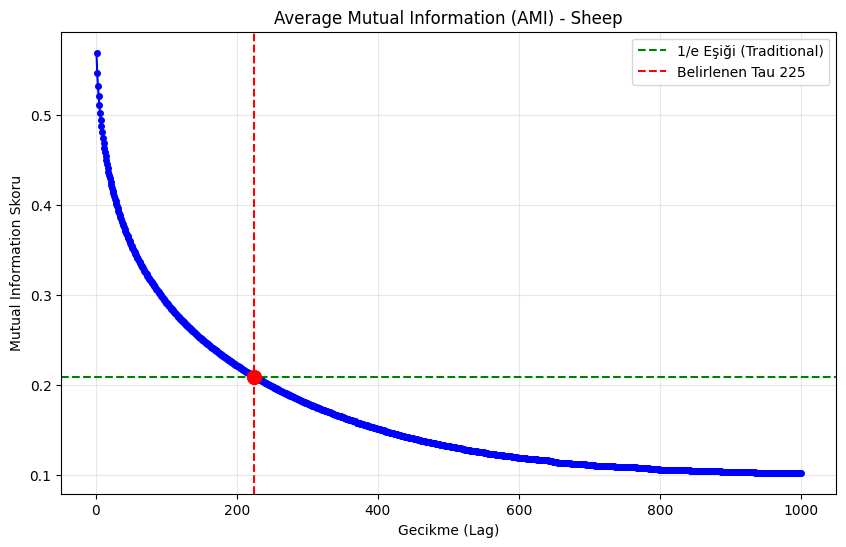

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(lags, scores, marker='o', linestyle='-', color='b', markersize=4)

# ACF tarzı yatay eşik çizgisi
plt.axhline(y=threshold, color='green', linestyle='--', label='1/e Eşiği (Traditional)')


# Eğer R 14 sonucunu verdiyse, o noktayı işaretleyelim
plt.axvline(x=tau_cross, color='r', linestyle='--', label=f'Belirlenen Tau {tau_cross}')
plt.scatter(tau_cross, scores[tau_cross-1], color='red', s=100, zorder=5) # 13. index 14. değere denk gelir

plt.title("Average Mutual Information (AMI) - Sheep")
plt.xlabel("Gecikme (Lag)")
plt.ylabel("Mutual Information Skoru")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [37]:
m, info = nk.complexity_dimension(lorenze_df['X'], delay=tau_cross, method='kennel1992', show=True)

plt.title(f"False Nearest Neighbors (Optimal Dimension m={m})")
plt.xlabel("Dimension (Boyut)")
plt.ylabel("False Neighbors Ratio (%)")
plt.show()

print(f"Sistem için en uygun Embedding Dimension (m): {m}")

ValueError: NeuroKit error: complexity_dimension(): 'method' not recognized.

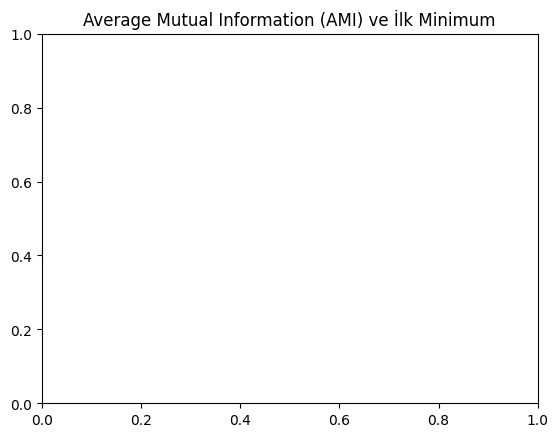

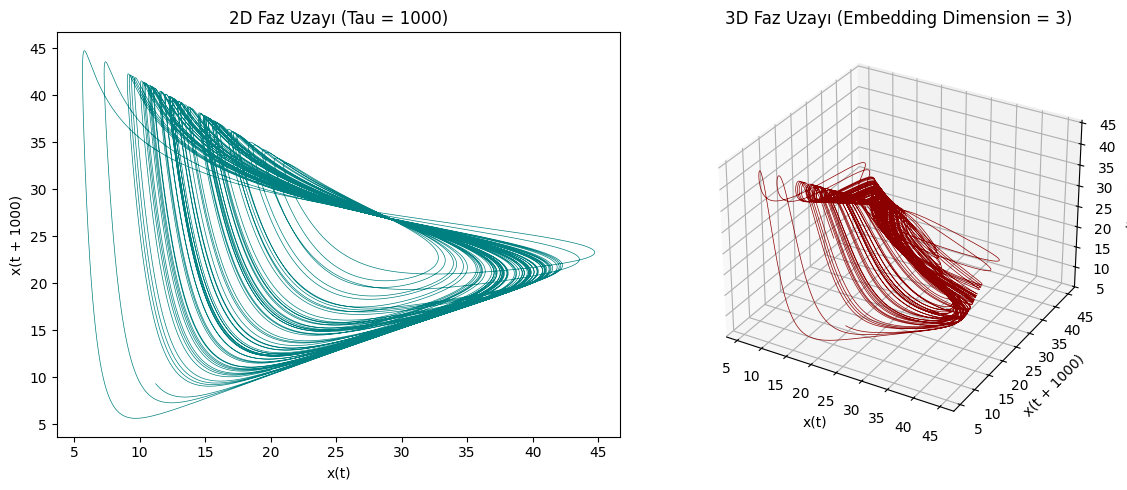

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import neurokit2 as nk

# Örnek veri seti (sheep serisini kullandığını varsayıyorum)
data = lorenze_df['Z'].values
tau = 1000 # R'da bulduğun değer

# 1. AMI Grafiği: Neden 14 seçildiğini görelim
# (Bu fonksiyon arka planda AMI hesaplar ve ilk minimumu işaretler)
nk.complexity_delay(data, delay_max=50, method='fraser1986', show=True)
plt.title("Average Mutual Information (AMI) ve İlk Minimum")
plt.show()

# 2. Faz Uzayı Görselleştirmesi
# 2D Görünüm: x(t) vs x(t + tau)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(data[:-tau], data[tau:], color='teal', lw=0.5)
plt.title(f"2D Faz Uzayı (Tau = {tau})")
plt.xlabel("x(t)")
plt.ylabel(f"x(t + {tau})")

# 3D Görünüm: x(t) vs x(t + tau) vs x(t + 2*tau)
ax = plt.subplot(1, 2, 2, projection='3d')
ax.plot(data[:-2*tau], data[tau:-tau], data[2*tau:], color='darkred', lw=0.5)
ax.set_title(f"3D Faz Uzayı (Embedding Dimension = 3)")
ax.set_xlabel("x(t)")
ax.set_ylabel(f"x(t + {tau})")
ax.set_zlabel(f"x(t + {2*tau})")

plt.tight_layout()
plt.show()

# Nolitsa


In [45]:
from nolitsa import delay, dimension

ImportError: Numba needs NumPy 2.3 or less. Got NumPy 2.4.